In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def ParseName(long_name):
    
    if 'SINE' in long_name:
        # To verify that the following fix is valid, just print them first (there aren't many)
        # print(long_name)
        long_name = long_name + '/SINE'
    
    temp = long_name.split('#')
    check = len(temp)
    if check != 2:
        print('This entry seems strange: ', temp)
        return False
    else:
        tname = temp[0]
    
    tname = temp[0]
    trest = temp[1]
    
    temp = trest.split('/')
    check = len(temp)
    if check != 2:
        print('This entry seems strange: ', temp)
        return False
    else:
        ttype = temp[0]
        tfamily = temp[1]

    if ttype == 'DNA':
        tpaste = 'DNA'
    else:
        tpaste = 'RNA'
    return tpaste, ttype, tfamily, tname

In [2]:
est = pd.read_csv('EstNum.csv',header=None)
plants = pd.read_csv('PlantNames.txt',header=None)
names = pd.read_csv('Names.txt',header=None)
idxTE = pd.read_csv('idxTE.csv',header=None)

est.columns = [p[0] for p in plants.values]
idx = idxTE.values.astype(bool)
te = est[idx]
te = te.reset_index(drop=True)

te_long_names = names[idx].reset_index(drop=True)

# Dropped due to no data
BAD_PLANT = 'IM_Z537'

tpastes = []
ttypes = []
tfams = []
tnames = []
for i,n in enumerate(te_long_names.values):
    try:
        tpaste, ttype, tfam, tname = ParseName(n[0])
        tpastes.append(tpaste)
        ttypes.append(ttype)
        tfams.append(tfam)
        tnames.append(tname)
    except:
        print(err)
        print(i)

In [3]:
checksum = te.sum(axis=0).iloc[0]

In [4]:
te['long_name'] = te_long_names
te.head(3)

IM_1042  IM_1054   IM_106  IM_109  IM_1133  IM_1145  IM_1152  IM_115  \
0   4.9095   4.3488   3.3271  1.8823   5.6818   3.9802   3.9057  4.2316   
1   3.2868   4.0774   5.1006  3.1398   5.0054   2.7775   3.0833  2.7694   
2   6.6708   5.6755  10.0550  6.1799   8.1221   7.7074   4.6437  2.9250   

   IM_1168  IM_116  ...  IM_Z519  IM_Z527  IM_Z537  IM_Z540  IM_Z557  IM_Z570  \
0   4.0583  4.9583  ...  28.6600   9.2245      NaN   6.6289   6.9707   3.5000   
1   2.9244  4.2516  ...   5.1322   2.1211      NaN   2.5653   1.1605   4.5261   
2   4.8785  5.4560  ...   4.8993   5.7597      NaN   6.0349   8.0655  11.4540   

   IM_Z589  IM_Z90  IM_Z95          long_name  
0  11.8500  9.0159  4.3189   CACTA1#DNA/CACTA  
1   2.6606  2.2376  2.0729  CACTA10#DNA/CACTA  
2   7.9635  6.3479  6.9639  CACTA11#DNA/CACTA  

[3 rows x 165 columns]

In [5]:
te['paste'] = tpastes
te.head(3)

IM_1042  IM_1054   IM_106  IM_109  IM_1133  IM_1145  IM_1152  IM_115  \
0   4.9095   4.3488   3.3271  1.8823   5.6818   3.9802   3.9057  4.2316   
1   3.2868   4.0774   5.1006  3.1398   5.0054   2.7775   3.0833  2.7694   
2   6.6708   5.6755  10.0550  6.1799   8.1221   7.7074   4.6437  2.9250   

   IM_1168  IM_116  ...  IM_Z527  IM_Z537  IM_Z540  IM_Z557  IM_Z570  IM_Z589  \
0   4.0583  4.9583  ...   9.2245      NaN   6.6289   6.9707   3.5000  11.8500   
1   2.9244  4.2516  ...   2.1211      NaN   2.5653   1.1605   4.5261   2.6606   
2   4.8785  5.4560  ...   5.7597      NaN   6.0349   8.0655  11.4540   7.9635   

   IM_Z90  IM_Z95          long_name  paste  
0  9.0159  4.3189   CACTA1#DNA/CACTA    DNA  
1  2.2376  2.0729  CACTA10#DNA/CACTA    DNA  
2  6.3479  6.9639  CACTA11#DNA/CACTA    DNA  

[3 rows x 166 columns]

In [6]:
te['type'] = ttypes
te.head(3)

IM_1042  IM_1054   IM_106  IM_109  IM_1133  IM_1145  IM_1152  IM_115  \
0   4.9095   4.3488   3.3271  1.8823   5.6818   3.9802   3.9057  4.2316   
1   3.2868   4.0774   5.1006  3.1398   5.0054   2.7775   3.0833  2.7694   
2   6.6708   5.6755  10.0550  6.1799   8.1221   7.7074   4.6437  2.9250   

   IM_1168  IM_116  ...  IM_Z537  IM_Z540  IM_Z557  IM_Z570  IM_Z589  IM_Z90  \
0   4.0583  4.9583  ...      NaN   6.6289   6.9707   3.5000  11.8500  9.0159   
1   2.9244  4.2516  ...      NaN   2.5653   1.1605   4.5261   2.6606  2.2376   
2   4.8785  5.4560  ...      NaN   6.0349   8.0655  11.4540   7.9635  6.3479   

   IM_Z95          long_name  paste  type  
0  4.3189   CACTA1#DNA/CACTA    DNA   DNA  
1  2.0729  CACTA10#DNA/CACTA    DNA   DNA  
2  6.9639  CACTA11#DNA/CACTA    DNA   DNA  

[3 rows x 167 columns]

In [7]:
te['family'] = tfams
te.head(3)

IM_1042  IM_1054   IM_106  IM_109  IM_1133  IM_1145  IM_1152  IM_115  \
0   4.9095   4.3488   3.3271  1.8823   5.6818   3.9802   3.9057  4.2316   
1   3.2868   4.0774   5.1006  3.1398   5.0054   2.7775   3.0833  2.7694   
2   6.6708   5.6755  10.0550  6.1799   8.1221   7.7074   4.6437  2.9250   

   IM_1168  IM_116  ...  IM_Z540  IM_Z557  IM_Z570  IM_Z589  IM_Z90  IM_Z95  \
0   4.0583  4.9583  ...   6.6289   6.9707   3.5000  11.8500  9.0159  4.3189   
1   2.9244  4.2516  ...   2.5653   1.1605   4.5261   2.6606  2.2376  2.0729   
2   4.8785  5.4560  ...   6.0349   8.0655  11.4540   7.9635  6.3479  6.9639   

           long_name  paste  type  family  
0   CACTA1#DNA/CACTA    DNA   DNA   CACTA  
1  CACTA10#DNA/CACTA    DNA   DNA   CACTA  
2  CACTA11#DNA/CACTA    DNA   DNA   CACTA  

[3 rows x 168 columns]

In [8]:
te['name'] = tnames
te.head(3)

IM_1042  IM_1054   IM_106  IM_109  IM_1133  IM_1145  IM_1152  IM_115  \
0   4.9095   4.3488   3.3271  1.8823   5.6818   3.9802   3.9057  4.2316   
1   3.2868   4.0774   5.1006  3.1398   5.0054   2.7775   3.0833  2.7694   
2   6.6708   5.6755  10.0550  6.1799   8.1221   7.7074   4.6437  2.9250   

   IM_1168  IM_116  ...  IM_Z557  IM_Z570  IM_Z589  IM_Z90  IM_Z95  \
0   4.0583  4.9583  ...   6.9707   3.5000  11.8500  9.0159  4.3189   
1   2.9244  4.2516  ...   1.1605   4.5261   2.6606  2.2376  2.0729   
2   4.8785  5.4560  ...   8.0655  11.4540   7.9635  6.3479  6.9639   

           long_name  paste  type  family     name  
0   CACTA1#DNA/CACTA    DNA   DNA   CACTA   CACTA1  
1  CACTA10#DNA/CACTA    DNA   DNA   CACTA  CACTA10  
2  CACTA11#DNA/CACTA    DNA   DNA   CACTA  CACTA11  

[3 rows x 169 columns]

In [9]:
# Summary by paste
te_paste = te.drop(columns=['long_name', 'type', 'family','name',BAD_PLANT])
te_by_paste = te_paste.groupby('paste').sum()
te_by_paste.to_csv('Mgut_TE_SummaryByPaste.csv')

if te_by_paste.sum().iloc[0] != checksum:
    print("Numbers don't match!")
    print(checksum-te_by_paste.sum().iloc[0])

In [10]:
# Summary by type
te_type = te.drop(columns=['long_name','paste','family','name',BAD_PLANT])
te_by_type = te_type.groupby('type').sum()
te_by_type.to_csv('Mgut_TE_SummaryByType.csv')

if te_by_type.sum().iloc[0] != checksum:
    print("Numbers don't match!")
    print(checksum-te_by_type.sum().iloc[0])

In [11]:
# Summary by family
te_fam = te.drop(columns=['long_name','paste','type','name',BAD_PLANT])
te_by_fam = te_fam.groupby('family').sum()
te_by_fam.to_csv('Mgut_TE_SummaryByFamily.csv')

# The numbers don't match as a result of floating point error here
if te_by_fam.sum().iloc[0] != checksum:
    print("Numbers don't match!")
    print(checksum-te_by_fam.sum().iloc[0])

Numbers don't match!
7.275957614183426e-12


In [12]:
te_name_map = te[['paste','type','family']].drop_duplicates().reset_index(drop=True)
te_name_map

paste  type         family
0    DNA   DNA          CACTA
1    RNA   LTR          Copia
2    RNA   LTR          Gypsy
3    DNA   DNA  PIF-Harbinger
4    DNA   DNA           MULE
5    RNA   LTR        unknown
6    RNA  LINE             L1
7    DNA   DNA    Tc1-Mariner
8    RNA  SINE           SINE
9    DNA   DNA            hAT
10   DNA   DNA       Helitron

In [13]:
te_name_map.to_csv('TENameMap.csv',index=False)

In [14]:
# Fano factors grouped by Paste
te_by_paste.var(axis=1)/te_by_paste.mean(axis=1)

paste
DNA    646.031014
RNA     60.639091
dtype: float64

In [15]:
# Fano factors grouped by Type
te_by_type.var(axis=1)/te_by_type.mean(axis=1)

type
DNA     646.031014
LINE     20.508315
LTR      54.083650
SINE     30.603031
dtype: float64

In [16]:
# Fano factors grouped by Family
te_by_fam.var(axis=1)/te_by_fam.mean(axis=1)

family
CACTA             12.215420
Copia             31.730806
Gypsy             25.090759
Helitron          92.411175
L1                20.508315
MULE             197.365062
PIF-Harbinger    143.276962
SINE              30.603031
Tc1-Mariner       79.746354
hAT              228.094980
unknown            7.643337
dtype: float64

In [17]:
te_by_fam.mean(axis=1)

family
CACTA              576.834631
Copia             2914.988002
Gypsy             2765.802075
Helitron          2364.839200
L1                 828.595742
MULE             13633.935698
PIF-Harbinger     3964.329813
SINE               815.408364
Tc1-Mariner       2423.612734
hAT               4595.817751
unknown            756.893856
dtype: float64

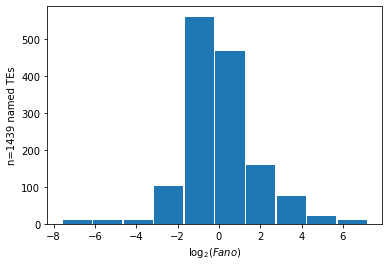

2.737431845617894

In [18]:
# For validation
plt.hist(np.log2(te.var(axis=1, numeric_only=True)/te.mean(axis=1,numeric_only=True)),rwidth=0.95)
plt.xlabel('$\\log_2(Fano)$')
plt.ylabel('n=1439 named TEs')
plt.show()
np.mean(te.var(axis=1, numeric_only=True)/te.mean(axis=1, numeric_only=True))

In [19]:
te.drop(columns=BAD_PLANT).to_csv('Mgut_TE_SummaryByElement.csv',index=False)

In [20]:
# Mean copy number by paste
te_by_paste.mean(axis=1)

paste
DNA    27559.369827
RNA     8081.688040
dtype: float64